In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.__version__

'1.23.5'

In [3]:
#!pip install numpy==1.26.4

In [4]:
mov_df = pd.read_csv('movies.csv')
rat_df = pd.read_csv('ratings.csv')

In [5]:
mov_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rat_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
len(np.unique(rat_df.userId))

610

In [8]:
rat_df.drop(['timestamp'], axis=1, inplace=True)

In [9]:
rat_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [10]:
mov_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
rat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,326.127564,182.618491,1.0,177.0,325.0,477.0,610.0
movieId,100836.0,19435.295718,35530.987199,1.0,1199.0,2991.0,8122.0,193609.0
rating,100836.0,3.501557,1.042529,0.5,3.0,3.5,4.0,5.0


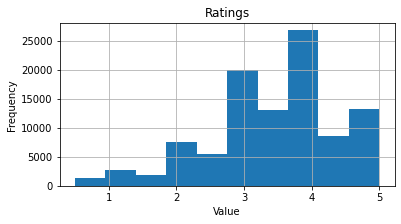

In [12]:
plt.figure(figsize = (6,3))
rat_df['rating'].hist()
plt.title('Ratings')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## **Content Based Filtering**

In [13]:
df_content = mov_df.copy()

In [14]:
df_content['list_genres'] = df_content['genres'].apply(lambda x: x.split("|"))

In [15]:
df_content.head()

,movieId,title,genres,list_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [16]:
listval  = []
for i in range(df_content.shape[0]):
    list_movies = df_content.iloc[i,3]
    for j in range(len(list_movies)):
        if list_movies[j] not in listval:
            listval.append(list_movies[j])

In [17]:
listval

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [18]:
def process_list(x):
    local_list = []
    for movie in x:
        if movie == 'Sci-Fi':
            local_list.append('SciFi')
        elif movie == 'Film-Noir':
            local_list.append('FilmNoir')
        elif movie == '(no genres listed)':
            local_list.append('NoGenres')
        else:
            local_list.append(movie)
    return ' '.join(local_list)

In [19]:
df_content['list_genres_f'] = df_content['list_genres'].apply(lambda x: process_list(x))

In [20]:
df_content.head()

,movieId,title,genres,list_genres,list_genres_f
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],Comedy


In [21]:
listval  = []
for i in range(df_content.shape[0]):
    list_movies = df_content.iloc[i,4].split(" ")
    for j in range(len(list_movies)):
        if list_movies[j] not in listval:
            listval.append(list_movies[j])

In [22]:
listval

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'SciFi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'FilmNoir',
 'NoGenres']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer(lowercase=False)
text_data = df_content['list_genres_f'].values
X = vectorizer.fit_transform(text_data)
df_content[vectorizer.get_feature_names_out()] = X.toarray()

In [25]:
df_content.head()

,movieId,title,genres,list_genres,list_genres_f,Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,NoGenres,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure Animation Children Comedy Fantasy,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",Adventure Children Fantasy,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",Comedy Romance,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",Comedy Drama Romance,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],Comedy,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_content.drop(['genres','list_genres','list_genres_f'], axis=1, inplace=True)

In [27]:
df_content.columns

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'NoGenres', 'Romance', 'SciFi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [28]:
from scipy.spatial.distance import cosine

In [29]:
X = df_content.drop(['movieId','title'],axis=1).values

In [30]:
X.shape

(9742, 20)

In [31]:
X[0], X[1], X[2]

(array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]))

In [32]:
1-cosine(X[0], X[2]) # Cosine Similarity = 1 - cosine distance

0.316227766016838

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
sim_matrix = cosine_similarity(X)

In [37]:
sim_matrix.shape

(9742, 9742)

In [38]:
#sim_matrix

In [39]:
def get_user_recommendations(userid=1, s_matrix= sim_matrix,  ratings = rat_df, movies = mov_df, min_rating = 4, n=5):
    ldf = rat_df[rat_df['userId']==userid]

    list_movies_liked = []
    for i in range(ldf.shape[0]):
        if ldf.iloc[i,2]> min_rating:
            list_movies_liked.append(ldf.iloc[i,1])

    list_movies_seen = []
    
    for k in range(ldf.shape[0]):
        list_movies_seen.append(ldf.iloc[k,1])

    recommendations = {}
    
    for j in range(mov_df.shape[0]):
        movie = mov_df.iloc[j,0]
        m1_index = mov_df[mov_df.movieId == movie].index[0]
        if movie in list_movies_liked or movie in list_movies_seen:
            continue
        else:
            for mov in list_movies_liked:
                m2_index = mov_df[mov_df.movieId == mov].index[0]
                old_score = recommendations.get((mov,movie))
                sim_score = s_matrix[m1_index,m2_index]
                if  old_score != None:
                    recommendations[(mov, movie)] = (sim_score + old_score)/2
                else:
                    recommendations[(mov, movie)] = sim_score
    
    sorted_list = list(dict(sorted(recommendations.items(), key=lambda item: item[1],reverse=True)))
    final_rec = []
    for k in sorted_list:
        if k[1] not in final_rec and len(final_rec) <n:
            final_rec.append(k[1])
    
    list_of_movies = []
    for rmovie in final_rec:
        list_of_movies.append(mov_df[mov_df.movieId == rmovie]['title'].values[0])

    return list_of_movies
    

In [ ]:
get_user_recommendations(userid=1, min_rating = 4.5)

In [ ]:
movies_dict = {}
for i in range(0, mov_df.shape[0]):
    movies_dict[mov_df.iloc[i,0]] = mov_df.iloc[i,1]
    
def movies_liked_by_user(userid, data=rat_df, n=5, min_rating = 3):
    ratings_df = rat_df.copy()[rat_df['userId']==userid]
    ratings_df.where(data['rating']>=min_rating, inplace=True)
    ratings_df.sort_values(by = 'rating', ascending=False, inplace=True)
    movies_list = []
    for i in range(ratings_df.shape[0]):
        mov_rating = ratings_df.iloc[i,2]
        movie_id = ratings_df.iloc[i,1]
        movies_list.append(movies_dict.get(movie_id))
    return movies_list[0:n]

In [ ]:
movies_liked_by_user(userid = 1, min_rating = 4.5)

## **User-Item collaborative filtering**

In [ ]:
!pip install scikit-surprise --quiet

In [40]:
from surprise import KNNBasic, accuracy
from surprise import Reader, Dataset

In [41]:
mov_reader = Reader(line_format='user item rating', rating_scale=(0.5,5))

In [42]:
data = Dataset.load_from_df(rat_df[['userId','movieId','rating']], reader=mov_reader)

In [43]:
type(data)

surprise.dataset.DatasetAutoFolds

In [44]:
data.df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [45]:
from surprise.model_selection import train_test_split

In [46]:
train_data, test_data = train_test_split(data=data,
                                         random_state=12345,
                                         train_size=0.8)

In [47]:
knn_model = KNNBasic(k=15, min_k=5, sim_options = {'name': 'cosine', 'user_based': True}, verbose=True)

In [48]:
knn_model.fit(train_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [49]:
predictions = knn_model.test(test_data)

In [50]:
predictions[0]

Prediction(uid=414, iid=4649, r_ui=2.0, est=3.8937510909858637, details={'actual_k': 5, 'was_impossible': False})

In [51]:
#test_data

In [52]:
test_df = pd.DataFrame(test_data, columns = ['UserId','MovieId','Rating'])

In [53]:
test_df.head()

,UserId,MovieId,Rating
0,414,4649,2.0
1,477,908,4.0
2,432,1653,4.0
3,599,4344,2.5
4,280,91077,4.5


In [54]:
ratings = []
for i in range(len(predictions)):
    ratings.append(np.round(predictions[i].est,1))

test_df['predicted_rating'] = ratings

In [55]:
test_df.head()

,UserId,MovieId,Rating,predicted_rating
0,414,4649,2.0,3.9
1,477,908,4.0,4.4
2,432,1653,4.0,4.0
3,599,4344,2.5,3.1
4,280,91077,4.5,3.8


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
rmse = np.sqrt(mean_squared_error(y_true=test_df['Rating'], y_pred = test_df['predicted_rating']))

In [58]:
print(f"Root Mean Squared Error {rmse:,.2f}")

Root Mean Squared Error 0.98


In [59]:
movies_dict = {}
for i in range(0, mov_df.shape[0]):
    movies_dict[mov_df.iloc[i,0]] = mov_df.iloc[i,1]

In [60]:
def movies_liked_by_user(userid, data=rat_df, n=5, min_rating = 3):
    ratings_df = rat_df.copy()[rat_df['userId']==userid]
    ratings_df.where(data['rating']>=min_rating, inplace=True)
    ratings_df.sort_values(by = 'rating', ascending=False, inplace=True)
    movies_list = []
    for i in range(ratings_df.shape[0]):
        mov_rating = ratings_df.iloc[i,2]
        movie_id = ratings_df.iloc[i,1]
        movies_list.append(movies_dict.get(movie_id))
    return movies_list[0:n]

In [61]:
def get_top_N(userid, model=knn_model, data=rat_df, n=5):
  user_predictions = {}
  for i in range(mov_df.shape[0]):
    movId = mov_df.iloc[i,0]
    user_movies = data[data.userId == userid]['movieId'].values
    if  movId not in user_movies:
        user_predictions[movies_dict.get(movId)] = np.round(model.predict(uid=userid, iid=movId)[3],1)
    if n==-1:
        retval = list(dict(sorted(user_predictions.items(), key=lambda item: item[1],reverse=True)))
    else:
        retval = list(dict(sorted(user_predictions.items(), key=lambda item: item[1],reverse=True)))[0:n]

  return retval

In [62]:
def HitRate(predictions, threshold = 3.5):
    hits = 0
    total_users = len(set(pred.uid for pred in predictions)) # Count unique users
    user_hits = {} # Dictionary to track if a user has a hit

    for pred in predictions:
        # A simple definition of a hit: if the predicted rating is >= the actual rating
        if (pred.est >= pred.r_ui) and (pred.est > threshold):
            user_hits[pred.uid] = True # Mark this user as having a hit

    hits = sum(user_hits.values()) # Count the number of users with at least one hit
    return hits / total_users if total_users > 0 else 0

In [63]:
movies_liked_by_user(userid=1)

['All Quiet on the Western Front (1930)',
 'NeverEnding Story, The (1984)',
 'Rescuers, The (1977)',
 'Rocketeer, The (1991)',
 'Indiana Jones and the Temple of Doom (1984)']

In [64]:
get_top_N(userid = 1)

['Trial, The (Procès, Le) (1962)',
 'Last Picture Show, The (1971)',
 'Life Is Beautiful (La Vita è bella) (1997)',
 'Three Billboards Outside Ebbing, Missouri (2017)',
 'Shawshank Redemption, The (1994)']

In [65]:
HitRate(predictions)

0.90311986863711

## **Item-Based collaborative filtering**

In [66]:
item_model = KNNBasic(k=15, min_k=5, sim_options = {'name': 'cosine', 'user_based': False}, verbose=True)

In [67]:
item_model.fit(train_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [68]:
predictions = item_model.test(test_data)

In [69]:
test_df_item = pd.DataFrame(test_data, columns = ['UserId','MovieId','Rating'])

In [70]:
test_df_item.head()

,UserId,MovieId,Rating
0,414,4649,2.0
1,477,908,4.0
2,432,1653,4.0
3,599,4344,2.5
4,280,91077,4.5


In [71]:
ratings = []
for i in range(len(predictions)):
    ratings.append(np.round(predictions[i].est,1))

test_df_item['predicted_rating'] = ratings

In [72]:
rmse = np.sqrt(mean_squared_error(y_true=test_df_item['Rating'], y_pred = test_df_item['predicted_rating']))

In [73]:
print(f"Root Mean Squared Error {rmse:,.2f}")

Root Mean Squared Error 1.01


In [74]:
movies_liked_by_user(userid=1)

['All Quiet on the Western Front (1930)',
 'NeverEnding Story, The (1984)',
 'Rescuers, The (1977)',
 'Rocketeer, The (1991)',
 'Indiana Jones and the Temple of Doom (1984)']

In [75]:
get_top_N(userid=1, model=item_model)

['101 Reykjavik (101 Reykjavík) (2000)',
 'Nicotina (2003)',
 '9/11 (2002)',
 'Boy A (2007)',
 'Bangkok Dangerous (2008)']

In [76]:
HitRate(predictions)

0.812807881773399

## **Singular Value Decomposition**

In [77]:
from surprise import SVD

In [78]:
svd_model = SVD(random_state=12345)

In [79]:
svd_model.fit(train_data)

In [80]:
predictions = svd_model.test(test_data)

In [81]:
test_df_svd = pd.DataFrame(test_data, columns = ['UserId','MovieId','Rating'])

In [82]:
ratings = []
for i in range(len(predictions)):
    ratings.append(np.round(predictions[i].est,1))

test_df_svd['predicted_rating'] = ratings

In [83]:
rmse = np.sqrt(mean_squared_error(y_true=test_df_svd['Rating'], y_pred = test_df_svd['predicted_rating']))

In [84]:
print(f"Root Mean Squared Error {rmse:,.2f}")

Root Mean Squared Error 0.88


In [85]:
movies_liked_by_user(userid=1)

['All Quiet on the Western Front (1930)',
 'NeverEnding Story, The (1984)',
 'Rescuers, The (1977)',
 'Rocketeer, The (1991)',
 'Indiana Jones and the Temple of Doom (1984)']

In [86]:
get_top_N(userid=1, model=svd_model)

['Taxi Driver (1976)',
 'Shawshank Redemption, The (1994)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
 'Godfather, The (1972)',
 'Casablanca (1942)']

In [87]:
HitRate(predictions)

0.8686371100164204